In [1]:
!pwd

/Users/martapiscitelli/Desktop/Marta/uni/MASTER/Lab/chaoss


In [2]:
ls

2bodyEulerCromer_1000_steps_per_Orbit.txt
2bodyEulerCromer_100_steps_per_Orbit.txt
2bodyEulerCromer_10_steps_per_Orbit.txt
2bodyEulerCromer_500_steps_per_Orbit.txt
2bodyEulerCromer_50_steps_per_Orbit.txt
2bodyEulerCromer_adaptive_eta=1.0e-03.txt
2bodyEuler_1000_steps_per_Orbit.txt
2bodyEuler_100_steps_per_Orbit.txt
2bodyEuler_10_steps_per_Orbit.txt
2bodyEuler_500_steps_per_Orbit.txt
2bodyEuler_50_steps_per_Orbit.txt
2bodyEuler_adaptive_eta=1.0e-03.txt
2bodyLeapFrog_500_steps_per_Orbit.txt
2bodyLeapFrog_adaptive_eta=1.0e-03.txt
2bodyLeapfrog_1000_steps_per_Orbit.txt
2bodyLeapfrog_100_steps_per_Orbit.txt
2bodyLeapfrog_10_steps_per_Orbit.txt
2bodyLeapfrog_50_steps_per_Orbit.txt
2bodyRK4_1000_steps_per_Orbit.txt
2bodyRK4_100_steps_per_Orbit.txt
2bodyRK4_10_steps_per_Orbit.txt
2bodyRK4_500_steps_per_Orbit.txt
2bodyRK4_50_steps_per_Orbit.txt
2bodyRK4_adaptive_eta=1.0e-03.txt
2bodyRK4_adaptive_eta=2.0e-03.txt
2bodyRK4_adaptive_eta=6.3e-01.txt
3bodyRK4_delta=2.00e-02_adaptive_eta=6.3e-03.txt
3

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import math 
from scipy.optimize import curve_fit
from scipy.special import wofz

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
cmap = plt.get_cmap('Set3')
cmap2 = plt.get_cmap('Set1')
cmap3 = plt.get_cmap('Dark2')
cmap4 = plt.get_cmap('tab20b')
cmap5 = plt.get_cmap('Set2')
cmap6 = plt.get_cmap('tab10')
cmap7 = plt.get_cmap('tab20')

In [4]:
# parameters for figure size
w = 7
h = 6
save = True 

In [31]:
#importing data
test=pd.read_csv('./3bodyRK4_delta=2.10e-02_adaptive_eta=6.3e-03.txt',
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","p3","x3", "y3", "z3","vx3","vy3","vz3", "e1","e2","a1","a2", "h", "counts"],
encoding='latin-1',
    sep=" "
)
print(test)
#print(test.x3)

                   t  p1            x1            y1   z1           vx1  \
0           0.000000   1  2.099996e-08  0.000000e+00  0.0  0.000000e+00   
1           0.006283   1  2.100076e-08 -6.494922e-11  0.0  2.558038e-10   
2           0.009929   1  2.100197e-08 -1.026341e-10  0.0  4.042438e-10   
3           0.013576   1  2.100371e-08 -1.403100e-10  0.0  5.526722e-10   
4           0.017222   1  2.100600e-08 -1.779740e-10  0.0  7.010852e-10   
...              ...  ..           ...           ...  ...           ...   
1056039  6283.159000   1 -1.867513e-06 -7.632501e-07  0.0  7.369337e-07   
1056040  6283.164700   1 -1.863284e-06 -7.737343e-07  0.0  7.473835e-07   
1056041  6283.170400   1 -1.858995e-06 -7.841958e-07  0.0  7.578109e-07   
1056042  6283.176100   1 -1.854646e-06 -7.946342e-07  0.0  7.682156e-07   
1056043  6283.181800   1 -1.850238e-06 -8.050492e-07  0.0  7.785973e-07   

                  vy1  vz1  p2        x2  ...   z3       vx3       vy3  vz3  \
0       -1.033745e-0

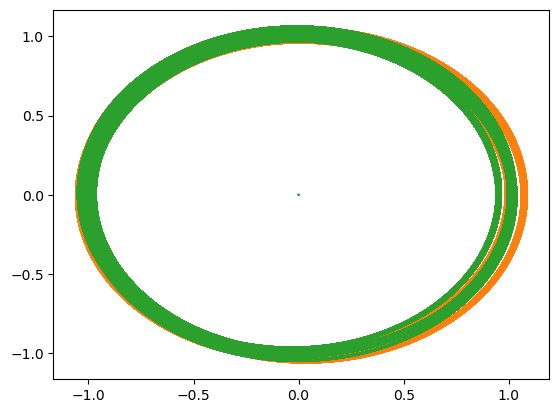

In [32]:
plt.plot(test.x1, test.y1)

plt.plot(test.x2, test.y2)

plt.plot(test.x3, test.y3)
plt.savefig("nonadaptive_test.pdf")

#

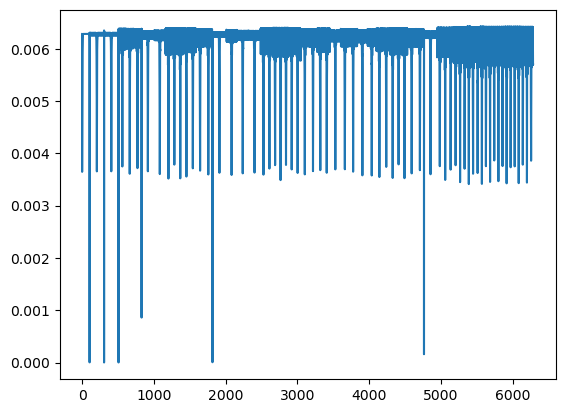

In [33]:
#plt.plot(test.t, np.log10( np.abs( (test.E-test.E[0])/test.E[0] ) )    )
plt.plot(test.t, test.h)
#plt.plot(test.t, test.E)

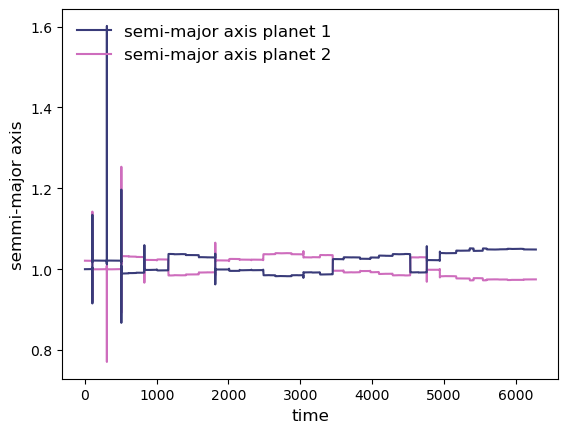

In [34]:
#plt.scatter(test.t, test.a1, s=1)
#plt.scatter(test.t, test.a2, s=1)


plt.plot(test.t, test.a1, ms=1, linestyle= 'solid',color = cmap4(0), zorder = 1, label='semi-major axis planet 1')
plt.plot(test.t, test.a2, ms=1,color = cmap4(18),zorder = 0,label='semi-major axis planet 2')
#plt.scatter(test.t, test.e1, s=0.1,color = cmap4(0), zorder = 1, label='eccentiricty planet 1')


# plot design
plt.xlabel('time',fontsize = 12)
plt.ylabel('semmi-major axis', fontsize = 12)
plt.legend(fancybox= True, framealpha=0, fontsize= 12, loc='upper left')


plt.savefig("semimajaxis_pb4.pdf")

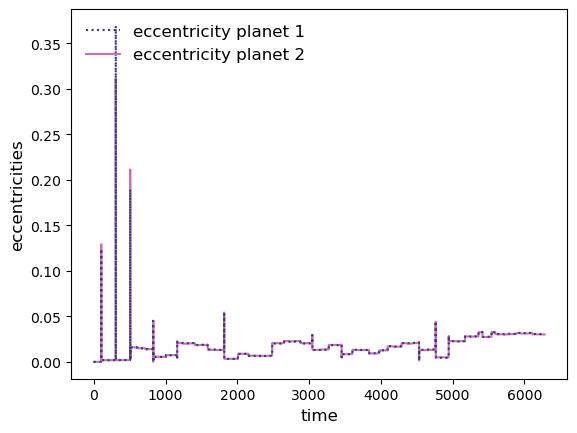

In [35]:
plt.plot(test.t, test.e1, ms=1, linestyle= 'dotted',color = cmap4(0), zorder = 1, label='eccentricity planet 1')
plt.plot(test.t, test.e2, ms=1,color = cmap4(18),zorder = 0,label='eccentricity planet 2')
#plt.scatter(test.t, test.e1, s=0.1,color = cmap4(0), zorder = 1, label='eccentiricty planet 1')


# plot design
plt.xlabel('time',fontsize = 12)
plt.ylabel('eccentricities', fontsize = 12)
plt.legend(fancybox= True, framealpha=0, fontsize= 12, loc='upper left')


plt.savefig("eccentricities_pb4.pdf")

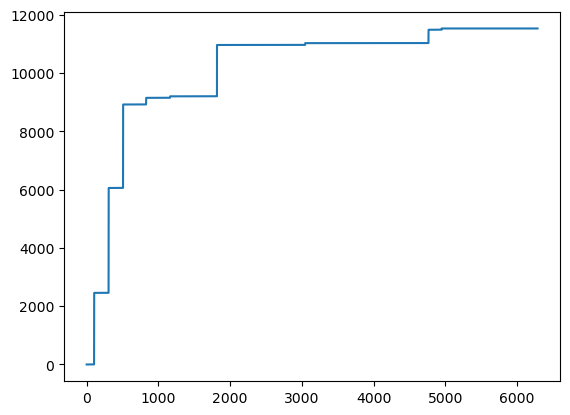

In [36]:
plt.plot(test.t, test.counts)